In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:

pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.1 MB 975.2 kB/s eta 0:00:12
    --------------------------------------- 0.3/11.1 MB 2.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/11.1 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.1 MB 6.4 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.1 MB 11.6 MB/s eta 0:00:01
   ---------------------- ----------------- 6.2/11.1 MB 19.9 MB/s eta 0:00:01
   ------------------------ --------------- 6.9/11.1 MB 22.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.8/11.1 MB 20.0 MB/s eta 0:00:01
   ----------------------------- ---------- 8.2/11.1 MB 19.5 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 18.4 MB/s eta 0:00:01
   --------------------------------- ------ 9.3/11.1 MB 17.4 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import sklearn 

sklearn.__version__

'1.6.1'

In [17]:
df = pd.read_csv('../Data/salaries_experience.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [34]:
# modelado 
# aprendizaje supervisado
# Datos de entrada X (la entrada suele ser en mayúsculas)
# Datos de salida y (la salida suele ser en minúsculas)
# Algoritmo aprenda los datos y la relación que tiene cada entrada X la salida y
# si el algoritmo aprende luego puede predecir nuevas salidas Y frente a nuevas entradas X
# nosotros decidimos qué parametros usar

X = df[['YearsExperience']] # necesitamos que la X siga siendo un dataframe, no una serie, por eso usamos dobles corchetes
# type(X) es un dataframe
X[:5]

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [33]:
y = df['Salary'] # la salida si que puede ser una lista o array
y[:5]


0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [22]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [54]:
# importamos el modelo de la regresión lineal (recta entre 2 puntos)
from sklearn.linear_model import LinearRegression

# instanciar el algoritmo de regresión lineal
model = LinearRegression() # es una clase de python y con él creamos un objeto al que podemos entrenar

# entrenar el algoritmo
model.fit(X, y) 

# el punto en el eje y donde la recta creada por la regresión cruza con =0
print('Intercepto (w0 / b0):', model.intercept_)
# Tasa de cambio de y por cada unidad de cambio en X: 
# por cada año de experiencia el salario a predecir aumenta en  9449 € o $
print('Coeficiente (w1 / b1):', model.coef_)

Intercepto (w0 / b0): 25792.20019866871
Coeficiente (w1 / b1): [9449.96232146]


In [42]:
# para predecir usamos el metodo predict
# Realizar una predicción sobre cualquier cantidad de aos de experiencia

X_new = pd.DataFrame(data=[5.78, 2.43, 9.77], columns=['YearsExperience'])
X_new


,YearsExperience
0,5.78
1,2.43
2,9.77


In [45]:
X_new['Salary_pred'] = model.predict(X_new)


In [46]:
X_new # nos da la predicción del salario para los aos de experiencia que le hemos dado

,YearsExperience,Salary_pred
0,5.78,80412.982417
1,2.43,48755.608640
2,9.77,118118.332079


In [50]:
experience_years = 2.43
salary = model.intercept_ + model.coef_ * experience_years
salary

array([48755.6086398])

In [48]:
experience_years = 5.78
salary = model.intercept_ + model.coef_ * experience_years
salary

array([80412.98241668])

In [49]:
experience_years = 9.77
salary = model.intercept_ + model.coef_ * experience_years
salary

array([118118.33207928])

In [55]:
model.predict([[9.77]]) # Aquí le pasamos una nueva X
# para que no de warning mejor pasar un dataframe igual que el que teníamos, 
# con las mismas columnas que el que se entrenó

c:\Users\carol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([118118.33207928])

In [58]:
y_pred = model.predict(X) # aunque ya los conoce el modelo, vamos a ver si da errores
y_pred

# mean_absolute_error

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [59]:
df['Salary_pred'] = model.predict(X)
df.head()

,YearsExperience,Salary,Salary_pred
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


<Axes: xlabel='YearsExperience', ylabel='Salary'>

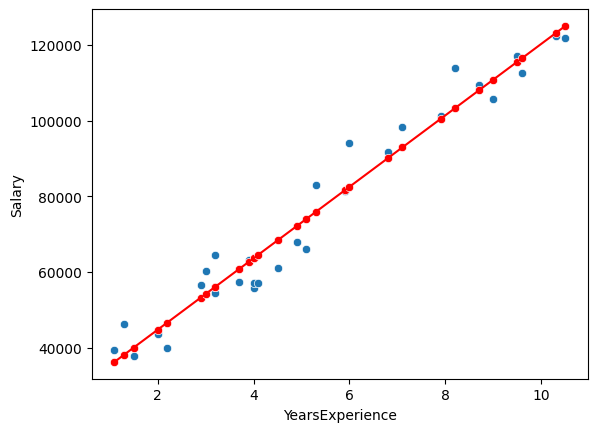

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.scatter(df['YearsExperience'], df['Salary'])
sns.scatterplot(df, x='YearsExperience', y='Salary')
sns.lineplot(df, x='YearsExperience', y='Salary_pred', c='r')
sns.scatterplot(df, x='YearsExperience', y='Salary_pred', c='r') # así vemos los puntos que se han generado con el modelo


In [73]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Error absoluto medio: hay un error de unos 4600 € en las predicciones de media
# Cuanto más cercano a 0, mejor, porque indica que hay menor error
# las 2 hacen lo mismo:
#mean_absolute_error(y, y_pred) 
mean_absolute_error(df['Salary'], df['Salary_pred'])


4644.2012894435375

In [77]:
# Raíz error cuadrático medio: RMSE (Root Mean Squared Error)
root_mean_squared_error(y, y_pred) # al dar un valor mayor que MAE, nos dice que hay valores mal escogidof


5592.043608760662

In [76]:
# calidad global : cómo de bien explica el modelo la variabilidad de los datos
# De 0 a 1
# Cuanto más cercano a 1 mejor: (aunque con datos reales es muy dificil)
# Penaliza predicciones que tengan un error muy grande, 
# si por ejemplo el modelo se ha equivocado mucho en 2 o 3 predicciones, las penaliza más que la MAE
r2_score(y, y_pred)


0.9569566641435086

In [ ]:
# regresión lineal múltiple: utiliza varios datos de entrada X, por ejemplo, varias columnas

# X = df[['YearsExperience', 'study_level', 'años_cotizados', 'age', 'city']] 

